In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
gdpEuro = pd.read_csv('gdp_euro_zone.csv')
gdpEuro.rename(columns={'EA19LORSGPORGYSAM': 'GDP'}, inplace=True)
gdpEuro['GDP'] = gdpEuro['GDP'].astype(float)
gdpEuro['observation_date'] = pd.to_datetime(gdpEuro['observation_date'])
gdpEuro['YEAR_MONTH'] = gdpEuro['observation_date'].dt.to_period('M')
gdpEuro = gdpEuro[
    gdpEuro['YEAR_MONTH'].between('2003-03', '2021-01')
]
gdpEuro.set_index('YEAR_MONTH', inplace=True)
gdpEuro.index = gdpEuro.index.to_timestamp()
gdpEuro.drop(['observation_date'], axis=1, inplace=True)
gdpEuro.head()

,GDP
YEAR_MONTH,
2003-03-01,0.726030
2003-04-01,0.625490
2003-05-01,0.558797
2003-06-01,0.537031
2003-07-01,0.563653


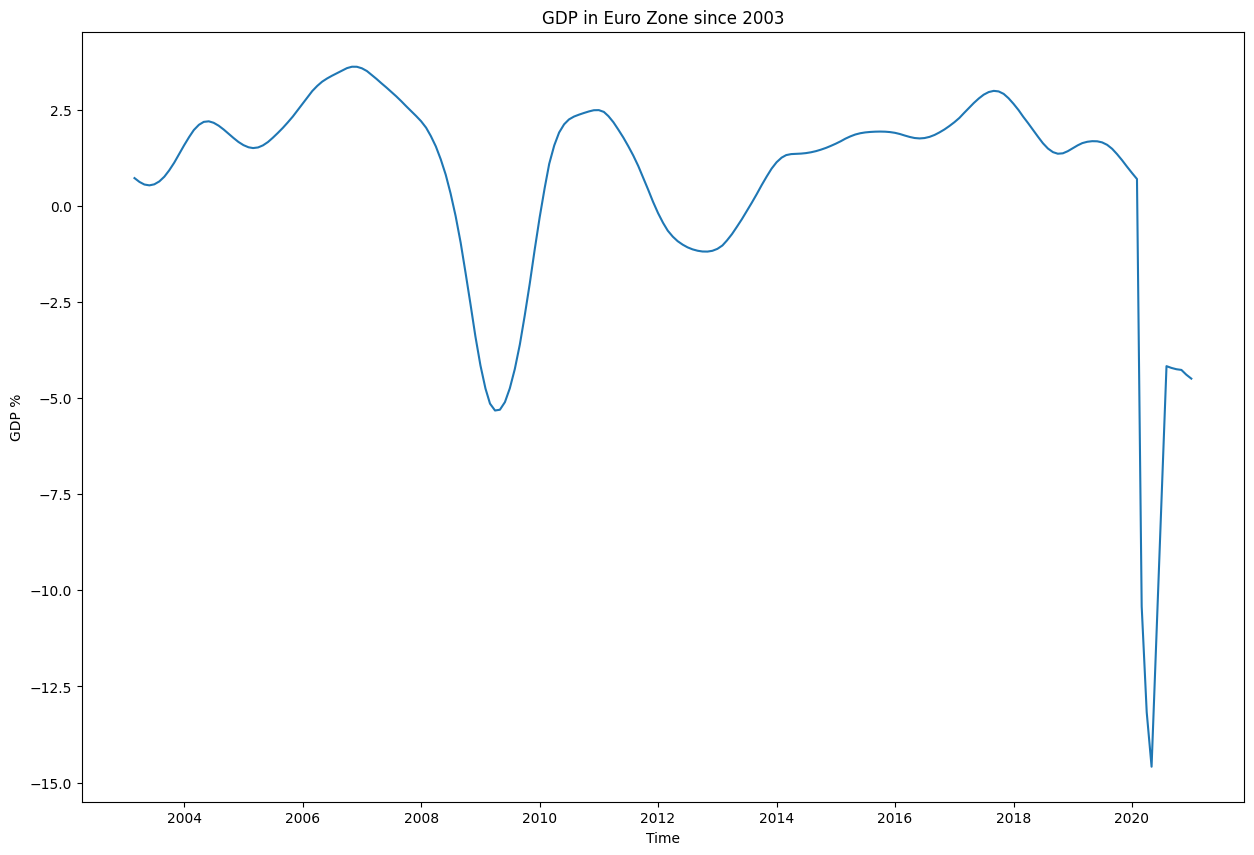

In [6]:
fig = plt.figure(figsize=(15,10))
plt.plot(gdpEuro.index, gdpEuro.GDP)
plt.xlabel('Time')
plt.ylabel('GDP %')
plt.title('GDP in Euro Zone since 2003')
plt.show()

In [7]:
gdpEuro.to_csv('gdp_euro_processed.csv', index=True)